<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Define-X_train-and-y_train" data-toc-modified-id="Define-X_train-and-y_train-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Define X_train and y_train</a></span></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualize the data</a></span></li><li><span><a href="#Linear-regression-model-prediction" data-toc-modified-id="Linear-regression-model-prediction-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Linear regression model prediction</a></span></li><li><span><a href="#Load-the-test-data" data-toc-modified-id="Load-the-test-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load the test data</a></span></li><li><span><a href="#Make-prediction-on-the-training-and-testing-data" data-toc-modified-id="Make-prediction-on-the-training-and-testing-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Make prediction on the training and testing data</a></span></li><li><span><a href="#Visualize-the-predictions" data-toc-modified-id="Visualize-the-predictions-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Visualize the predictions</a></span></li></ul></li><li><span><a href="#Polynomial-features" data-toc-modified-id="Polynomial-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Polynomial features</a></span><ul class="toc-item"><li><span><a href="#Generate-new-features" data-toc-modified-id="Generate-new-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate new features</a></span></li><li><span><a href="#Visualize-the-predictions" data-toc-modified-id="Visualize-the-predictions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualize the predictions</a></span></li><li><span><a href="#Add-polynomia-terms-degree-=5" data-toc-modified-id="Add-polynomia-terms-degree-=5-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Add polynomia terms degree =5</a></span></li></ul></li></ul></div>

# Polynomial Features

## Linear Regression

### Load the data

In [1]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')
data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


### Define X_train and y_train

In [11]:
X_train = data_train[['T']]
y_train = data_train.rate
X_train.shape, y_train.shape

((18, 1), (18,))

`X_train.T` don't use .T becasue it is a function. Use['T'] instead

### Visualize the data

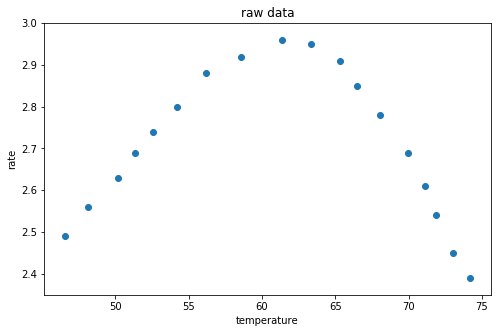

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

### Linear regression model prediction

In [13]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Load the test data

In [14]:
data_test = pd.read_csv('T-R-test.csv')
X_test = data_test[['T']]
y_test = data_test[['rate']]
X_test.shape, y_test.shape

((7, 1), (7, 1))

### Make prediction on the training and testing data

In [15]:
y_train_predicted = LR.predict(X_train)
y_test_predicted = LR.predict(X_test)
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_predicted)
test_r2 = r2_score(y_test, y_test_predicted)
print('train r2 :',train_r2)
print('test r2 :', test_r2)

train r2 : 0.016665703886981964
test r2 : -0.7583363437351314


### Visualize the predictions

In [22]:
#generate new data
X_range = np.linspace(40,90,100).reshape(-1,1)
y_range = LR.predict(X_range)

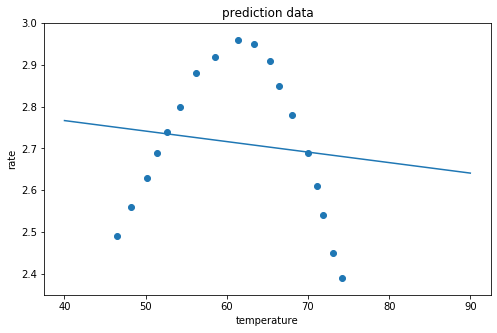

In [23]:
fig2 = plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train)
plt.plot(X_range, y_range)

plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

## Polynomial features

### Generate new features

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X_train)
X2_test = poly.transform(X_test) # for the test data, just transform
X2_train.shape

(18, 3)

In [28]:
LR2 = LinearRegression()
LR2.fit(X2_train,y_train)

y2_train_predicted = LR2.predict(X2_train)
y2_test_predicted = LR2.predict(X2_test)

train2_r2 = r2_score(y_train, y2_train_predicted)
test2_r2 = r2_score(y_test, y2_test_predicted)
print('train r2 :',train2_r2)
print('test r2 :', test2_r2)





train r2 : 0.970051540068943
test r2 : 0.996395455646867


### Visualize the predictions

In [29]:
X2_range = np.linspace(40,90,100).reshape(-1,1)
X2_range = poly.transform(X2_range)
y2_range = LR2.predict(X2_range)

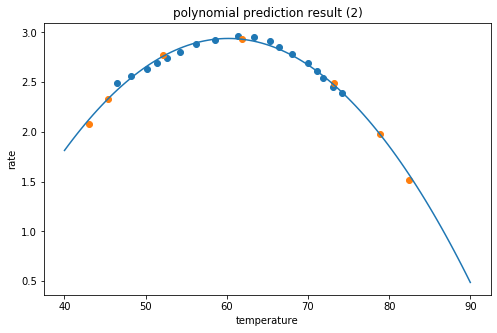

In [34]:
fig3 = plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train)
plt.plot(X_range,y2_range)
plt.scatter(X_test,y_test)

plt.title('polynomial prediction result (2)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

### Add polynomia terms degree =5

In [36]:
poly5=PolynomialFeatures(degree=5)
X5_train = poly5.fit_transform(X_train)
X5_test = poly5.transform(X_test)

In [37]:
LR5 = LinearRegression()
LR5.fit(X5_train,y_train)

y5_train_predicted = LR5.predict(X5_train)
y5_test_predicted = LR5.predict(X5_test)

train5_r2 = r2_score(y_train, y5_train_predicted)
test5_r2 = r2_score(y_test, y5_test_predicted)
print('train r2 :',train5_r2)
print('test r2 :', test5_r2)

train r2 : 0.9978527267142803
test r2 : 0.5437845982167842


Model works great on training set but poorly on test data set

In [38]:
X5_range = poly5.transform(X_range)
y5_range = LR5.predict(X5_range)

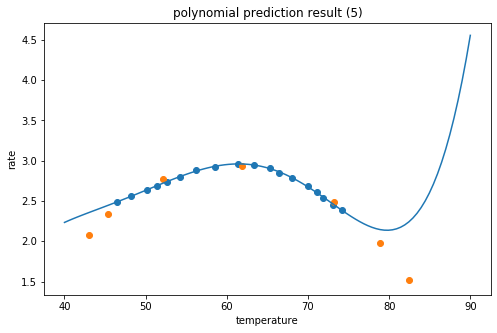

In [40]:
fig4 = plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train)
plt.plot(X_range,y5_range)
plt.scatter(X_test, y_test)
plt.title('polynomial prediction result (5)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()